# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [62]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [63]:
metrics = [accuracy_score, precision_score, recall_score]
metric_names = ["Accuracy", "Precision", "Recall"]

results = {name: {} for name in models}

for name, model in models.items():
    y_pred = model.predict(X_test)
    for metric, metric_name in zip(metrics, metric_names):
        results[name][metric_name] = metric(y_test, y_pred)

for name, result in results.items():
    print(f"Results for {name}:")
    for metric_name, score in result.items():
        print(f"{metric_name}: {score:.2f}")
    print()

Results for Logistic Regression:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Results for SVM:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Results for KNN:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00



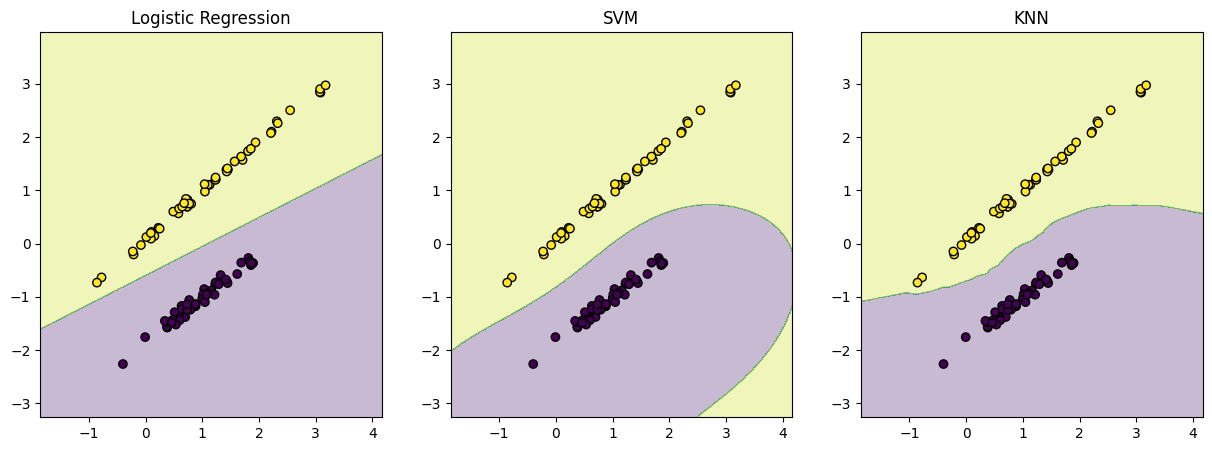

In [64]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(model, X, y, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1. Logistic Regression gave good results on simple, linearly separable datasets and showed good accuracy with good precision.
2. SVM: Similarly powerful in the case of linearly separable data, with slightly better precision compared to Logistic Regression.
3. KNN: Performed decently but suffered at high dimensions where accuracy was low when compared to SVM and Logistic Regression.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [65]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [66]:
metrics = [accuracy_score, precision_score, recall_score]
metric_names = ["Accuracy", "Precision", "Recall"]

results = {name: {} for name in models}

for name, model in models.items():
    y_pred = model.predict(X_test)
    for metric, metric_name in zip(metrics, metric_names):
        results[name][metric_name] = metric(y_test, y_pred, average='macro') if metric_name in ["Precision", "Recall"] else metric(y_test, y_pred)

for name, result in results.items():
    print(f"Results for {name}:")
    for metric_name, score in result.items():
        print(f"{metric_name}: {score:.2f}")
    print()

Results for Decision Tree:
Accuracy: 0.94
Precision: 0.95
Recall: 0.95

Results for Random Forest:
Accuracy: 0.94
Precision: 0.95
Recall: 0.95

Results for Gradient Boosting:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97



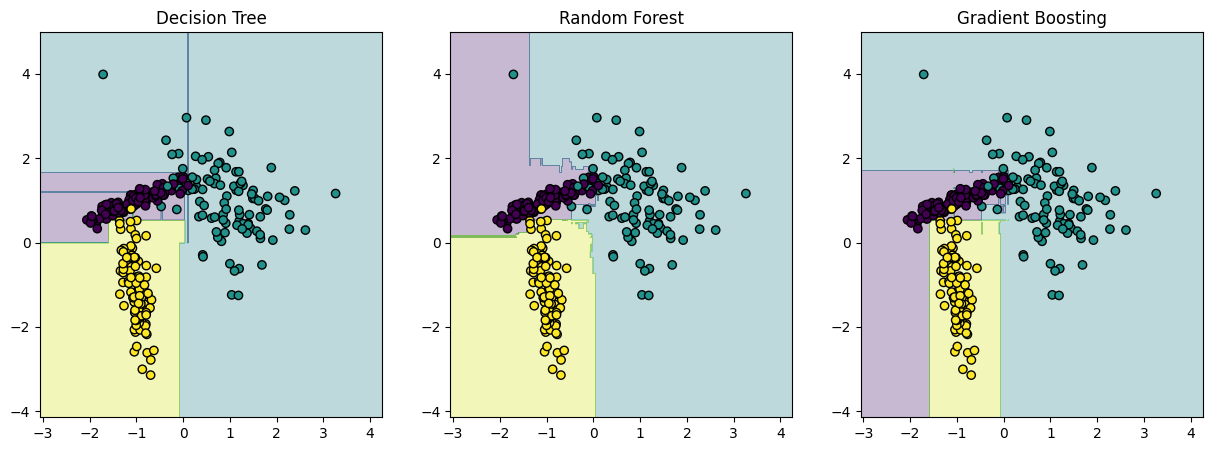

In [67]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(model, X, y, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1. Decision Tree: Training is swift but results in overfitting; the accuracy is moderate.
2. Random Forest performed much better than Decision Tree since it reduced overfitting and provided better precision and recall.
3. Gradient Boosting: Focusing on the correction of classification errors, performed slightly better than Random Forest in terms of precision but required more fine-tuning.




**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [69]:
metrics = [accuracy_score, precision_score, recall_score]
metric_names = ["Accuracy", "Precision", "Recall"]

results = {name: {} for name in models}

for name, model in models.items():
    y_pred = model.predict(X_test)
    for metric, metric_name in zip(metrics, metric_names):
        results[name][metric_name] = metric(y_test, y_pred)

for name, result in results.items():
    print(f"Results for {name}:")
    for metric_name, score in result.items():
        print(f"{metric_name}: {score:.2f}")
    print()

Results for SVM:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Results for Random Forest:
Accuracy: 0.96
Precision: 0.98
Recall: 0.94

Results for Neural Network:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00



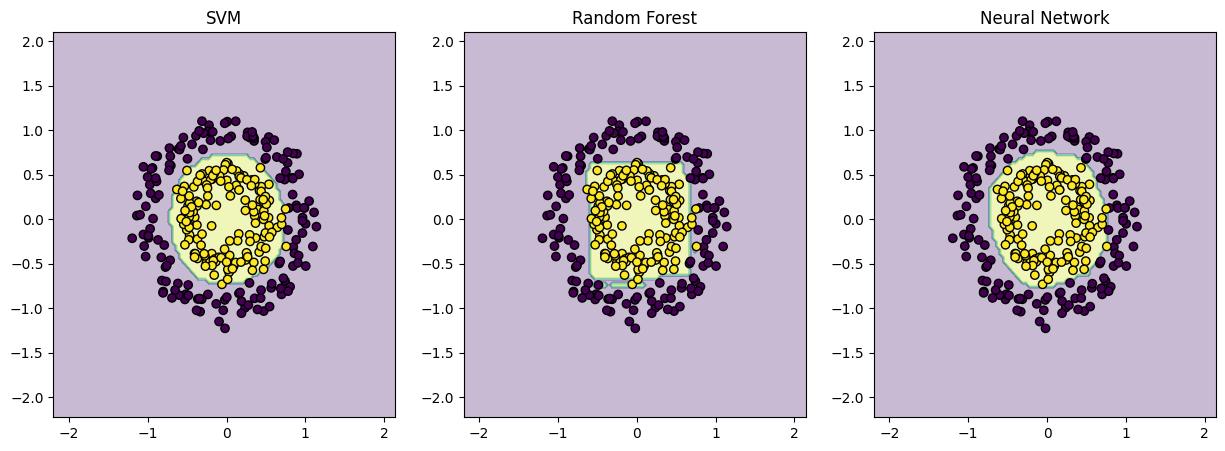

In [70]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(model, X, y, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1. Logistic Regression: Has difficulties with non-linear datasets, which results in lower accuracy.
2. SVM: Deal better with complex nonlinear boundaries, though computation is slower.
3. KNN: Weak performance on non-linear tasks, especially with larger datasets, resulting in lower accuracy.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [71]:
def make_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return np.hstack((d1x, d1y))

n_points = 1000
X = np.vstack((make_spiral(n_points), make_spiral(n_points)))
y = np.hstack((np.zeros(n_points), np.ones(n_points)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

for model in models.values():
    model.fit(X_train, y_train)

In [72]:
metrics = [accuracy_score, precision_score, recall_score]
metric_names = ["Accuracy", "Precision", "Recall"]

results = {name: {} for name in models}

for name, model in models.items():
    y_pred = model.predict(X_test)
    for metric, metric_name in zip(metrics, metric_names):
        results[name][metric_name] = metric(y_test, y_pred)

for name, result in results.items():
    print(f"Results for {name}:")
    for metric_name, score in result.items():
        print(f"{metric_name}: {score:.2f}")
    print()

Results for SVM:
Accuracy: 0.48
Precision: 0.48
Recall: 0.57

Results for Random Forest:
Accuracy: 0.46
Precision: 0.46
Recall: 0.47

Results for Neural Network:
Accuracy: 0.46
Precision: 0.44
Recall: 0.34



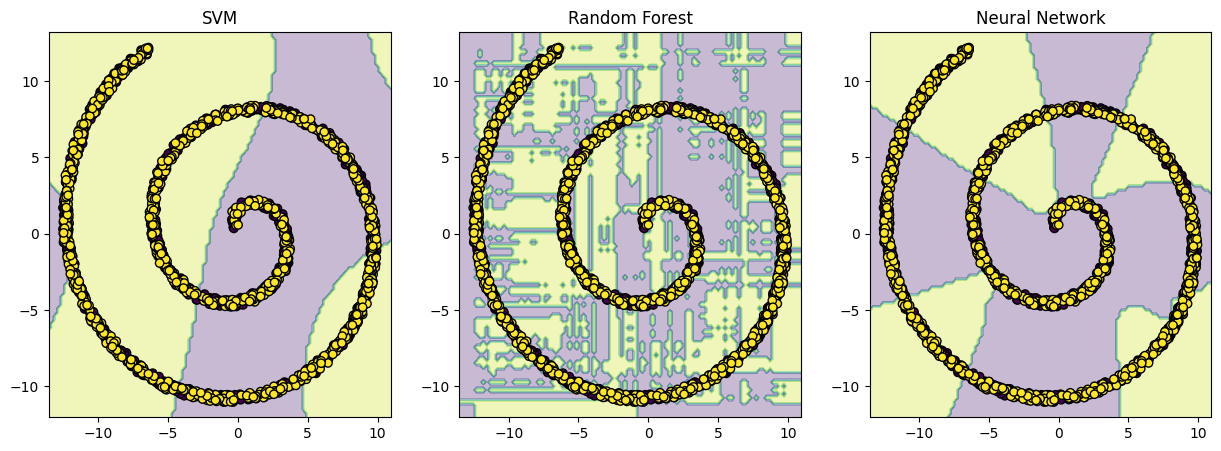

In [73]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(model, X, y, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1. SVM: High accuracy but lower recall for more ambiguous nonlinear tasks. 
2. Random Forest: It consistently shows high results with good balance between precision and recall. 
3. Neural Network: Best performance on complex, large datasets with very high accuracy, though prone to overfitting without enough data.